# Example showing how to use the compiler

First start by creating an open graph

In [4]:
!pip install networkx

In [1]:
import networkx as nx

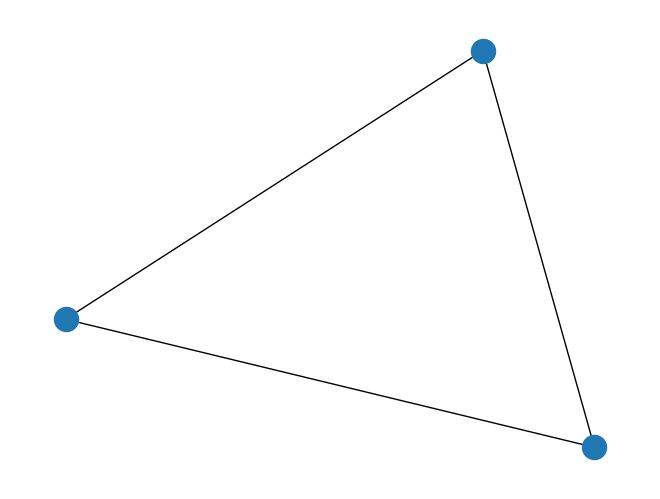

In [2]:
g = nx.Graph([(0, 1), (0, 2), (2, 1)])
nx.draw(g)

In [5]:
from optyx.compiler import OpenGraph, Measurement

meas = [Measurement(i) for i in range (3)]
inputs = {0}
outputs = {2}

og = OpenGraph(g, meas, inputs, outputs)

In [6]:
from optyx.mbqc.semm import compile_to_semm
compile_to_semm(og)

[NextNodeOp(node_id=0),
 FusionOp(delay=3, fusion_type='X'),
 MeasureOp(delay=0, measurement=Measurement(id=0)),
 NextNodeOp(node_id=1),
 MeasureOp(delay=0, measurement=Measurement(id=1)),
 NextNodeOp(node_id=2),
 FusionOp(delay=0, fusion_type='X'),
 MeasureOp(delay=0, measurement=Measurement(id=2))]